# Project 2 - CS5830: Data Science in Practice
## Crimes in Austin

Necessary Imports of data and libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
crimeDf = pd.read_csv("crime-housing-austin-2015.csv")
zipDf = pd.read_csv("AustinZipCodes.csv")

In [3]:
display(crimeDf)
display(crimeDf.columns)

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,...,80%,15%,99%,67%,3%,73%,207%,96%,$590,39%
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,...,70%,15%,99%,51%,104%,20%,64%,21%,$747,33%
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,...,67%,12%,97%,26%,26%,31%,68%,44%,$747,32%
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,...,78%,84%,100%,96%,208%,37%,46%,21%,$786,40%


Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

...I'm thinking of seeing if being richer means less crime. And if so, what is the threshold where crime rates go down.
I will be doing this by comparing the different types of workers...

I'm also thinking of seeing if being in a richer house means you get less clearances. I will also need to examine what type of crime was being committed.

...This one seems more interesting "I'm thinking of doing change in median home value vs. thief. Is it really worth getting a a house that you believe will go up in value a lot in the future?
With this analysis I would also need to see if there is a coorelation between types of crimes"...

/var/folders/_q/ksn1jczn0xsg1pkqfb6mcvp80000gn/T/ipykernel_51882/396313170.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  crimeDf['Medianrent'] = crimeDf['Medianrent'].str.replace('$', '').astype('float')


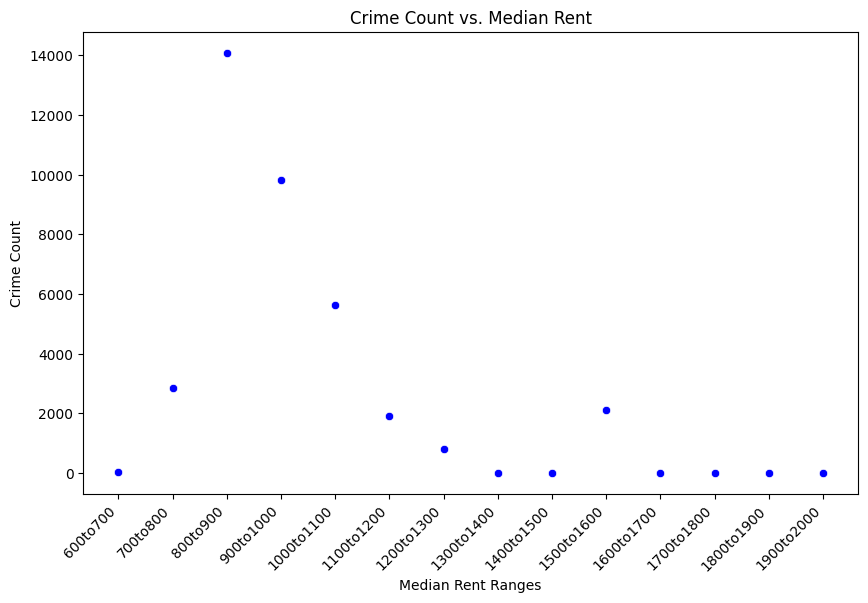

In [4]:
# Get the Rental Units for teacher
# Get the rental Units for tech worker
# get the ownerunits for teacher
# get the owner units for tech worker
crimeDf['Medianrent'] = crimeDf['Medianrent'].str.replace('$', '').astype('float')
# Set the maximum rent value
max_rent = 2000

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}

# Iterate through each 300-dollar increment up to the maximum rent
for rent_limit in range(700, max_rent + 100, 100):
    # Create a key for the current range
    key = f'{rent_limit - 100}to{rent_limit}'
    
    # Calculate the count for the current range
    count = crimeDf[(crimeDf.Medianrent >= rent_limit - 100) & (crimeDf.Medianrent < rent_limit)].Medianrent.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('Crime Count vs. Median Rent')
plt.xlabel('Median Rent Ranges')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# sns.scatterplot(x=crimeDf.Medianrent, y=)
# How do I seperate the data between a tech worker and a teacher? Maybe do it by median household income...

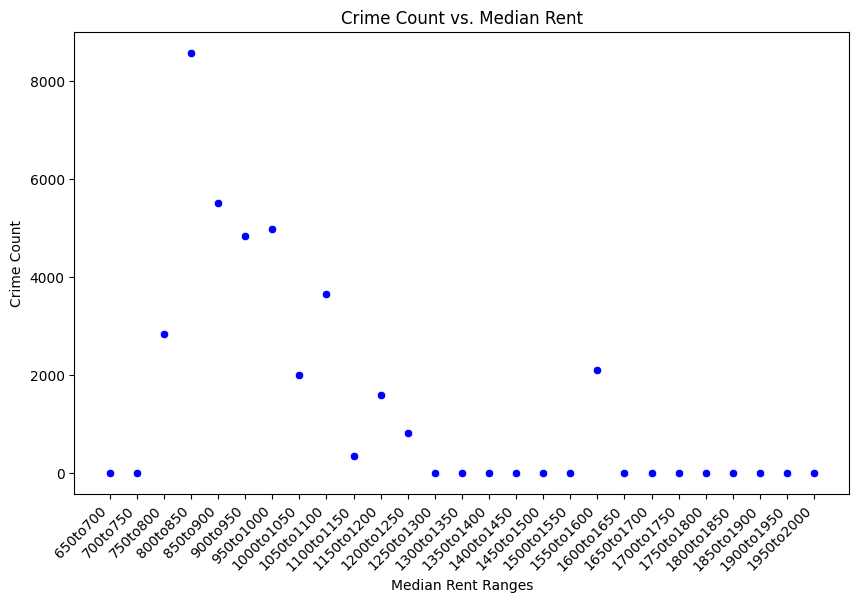

In [5]:
# Set the maximum rent value
max_rent = 2000

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}

# Iterate through each 300-dollar increment up to the maximum rent
for rent_limit in range(700, max_rent + 50, 50):
    # Create a key for the current range
    key = f'{rent_limit - 50}to{rent_limit}'
    
    # Calculate the count for the current range
    count = crimeDf[(crimeDf.Medianrent >= rent_limit - 50) & (crimeDf.Medianrent < rent_limit)].Medianrent.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('Crime Count vs. Median Rent')
plt.xlabel('Median Rent Ranges')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [6]:
weirdAnomoly = crimeDf[(crimeDf.Medianrent >= 1550) & (crimeDf.Medianrent < 1600)]
weirdAnomoly.columns

Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

In [7]:
weirdAnomoly.Zip_Code_Crime

25       78701.0
41       78701.0
60       78701.0
61       78701.0
73       78701.0
          ...   
38466    78701.0
38518    78701.0
38545    78701.0
38553    78701.0
38560    78701.0
Name: Zip_Code_Crime, Length: 2103, dtype: float64

I looked it up online and apparently For example, there are more retail establishments in the central part of the zip. Many crimes are committed in retail areas in blocks where few people live.

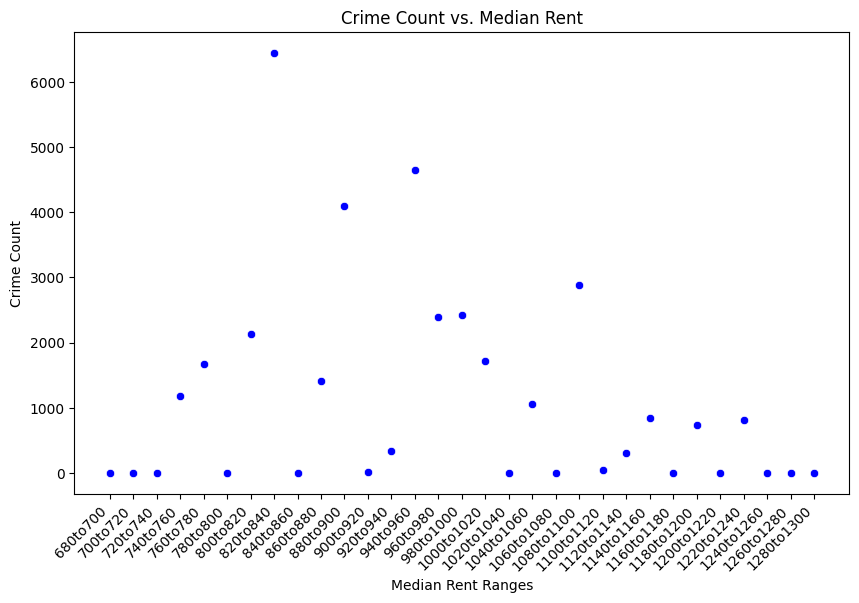

In [8]:
# Set the maximum rent value
max_rent = 1300

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}
keysForTTest = []
# Iterate through each 300-dollar increment up to the maximum rent
for rent_limit in range(700, max_rent + 20, 20):
    # Create a key for the current range
    key = f'{rent_limit - 20}to{rent_limit}'
    keysForTTest.append(max_rent)
    # Calculate the count for the current range
    count = crimeDf[(crimeDf.Medianrent >= rent_limit - 20) & (crimeDf.Medianrent < rent_limit)].Medianrent.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('Crime Count vs. Median Rent')
plt.xlabel('Median Rent Ranges')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [9]:
stats.ttest_ind(keysForTTest, values)

/var/folders/_q/ksn1jczn0xsg1pkqfb6mcvp80000gn/T/ipykernel_51882/68412341.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(keysForTTest, values)


Ttest_indResult(statistic=0.5804519114950707, pvalue=0.5637836781382588)

### Analysis
There is pvalue after performing the ttest is greater than the .05 suggesting that there is not enough evidence to conclude the rent mean and the number of crimes commited are correlated.


,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty20002012,Changeinmedianrent20002012,Changeinmedianhomevalue20002012,Percentageofhomeswithin1/4mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportationrelated
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40.0,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97.0,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40.0,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40.0,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44.0,63%,$708,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,...,80%,15%,99%,67%,3%,73%,207.0,96%,$590,39%
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,...,70%,15%,99%,51%,104%,20%,64.0,21%,$747,33%
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,...,67%,12%,97%,26%,26%,31%,68.0,44%,$747,32%
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,...,78%,84%,100%,96%,208%,37%,46.0,21%,$786,40%


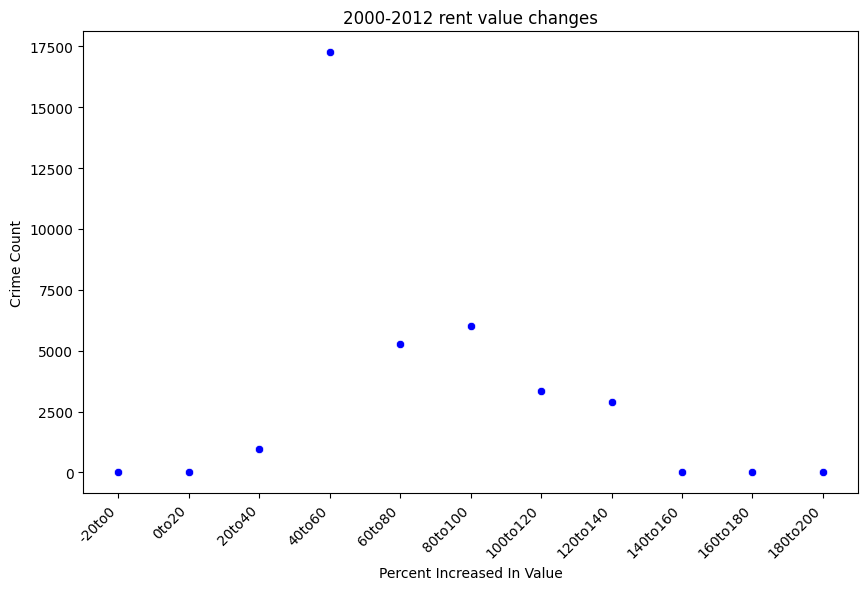

In [10]:
# years = crimeDf.Report_Date
crimeDf.columns = [c.replace('-', '') for c in crimeDf.columns]
crimeDf['Changeinmedianhomevalue20002012'] = crimeDf['Changeinmedianhomevalue20002012'].str.replace('%', '').astype('float')
display(crimeDf)
# Set the maximum percentage
max_percentage = 200

# Initialize an empty dictionary to store the counts for each range
rent_counts = {}
keysForTTest = []
# Iterate through each 300-dollar increment up to the maximum rent
for the_percent in range(0, max_percentage + 20, 20):
    # Create a key for the current range
    key = f'{the_percent - 20}to{the_percent}'
    keysForTTest.append(the_percent)
    # Calculate the count for the current range
    count = crimeDf[(crimeDf.Changeinmedianhomevalue20002012 >= the_percent - 20) & (crimeDf.Changeinmedianhomevalue20002012 < the_percent)].Changeinmedianhomevalue20002012.count()
    
    # Store the count in the dictionary
    rent_counts[key] = count

# Extract the keys and values from the rent_counts dictionary
keys = list(rent_counts.keys())
values = list(rent_counts.values())

# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=keys, y=values, color='blue')
plt.title('2000-2012 rent value changes')
plt.xlabel('Percent Increased In Value')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show() 


According to google, there was a 58% average housing cost spike for all of 2000 to 2012, so now the comparison will now be to see if there is greater number of crimes with higher than average spikes

In [11]:
crimeDf.Changeinmedianhomevalue20002012.mean()

75.22072962290353

There is a big difference

### Crimes by Council District

Let's look at some more data! I'm curious about the number of crimes per council district and the number of crime per crime type:

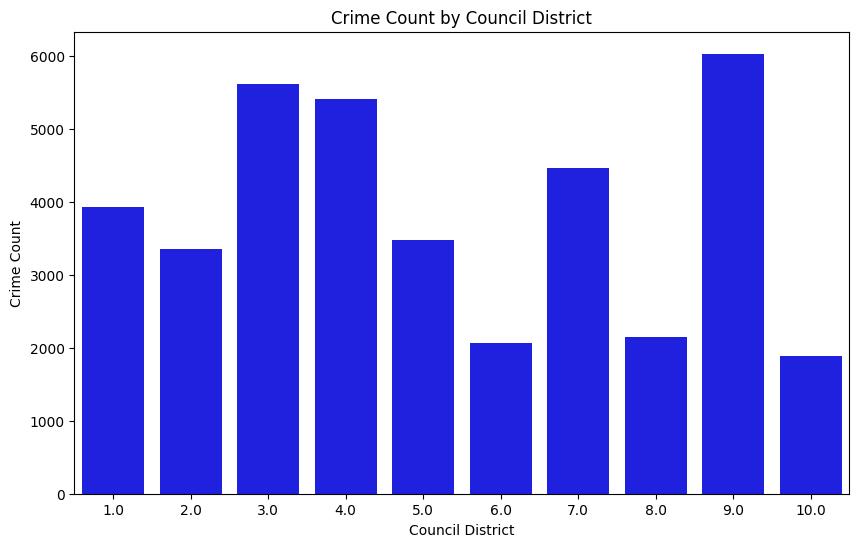

In [12]:
crime_distribution_by_district = crimeDf.groupby('Council_District').size().sort_values(ascending=False)

# Create a bar plot using seaborn with each district being a different color
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_distribution_by_district.index, y=crime_distribution_by_district.values, color='blue')
plt.title('Crime Count by Council District')
plt.xlabel('Council District')
plt.ylabel('Crime Count')
plt.show()


### Crimes by Crime type

Lets break out some of these crimes into crime type. It might give us some clues at what is going on in Austin.

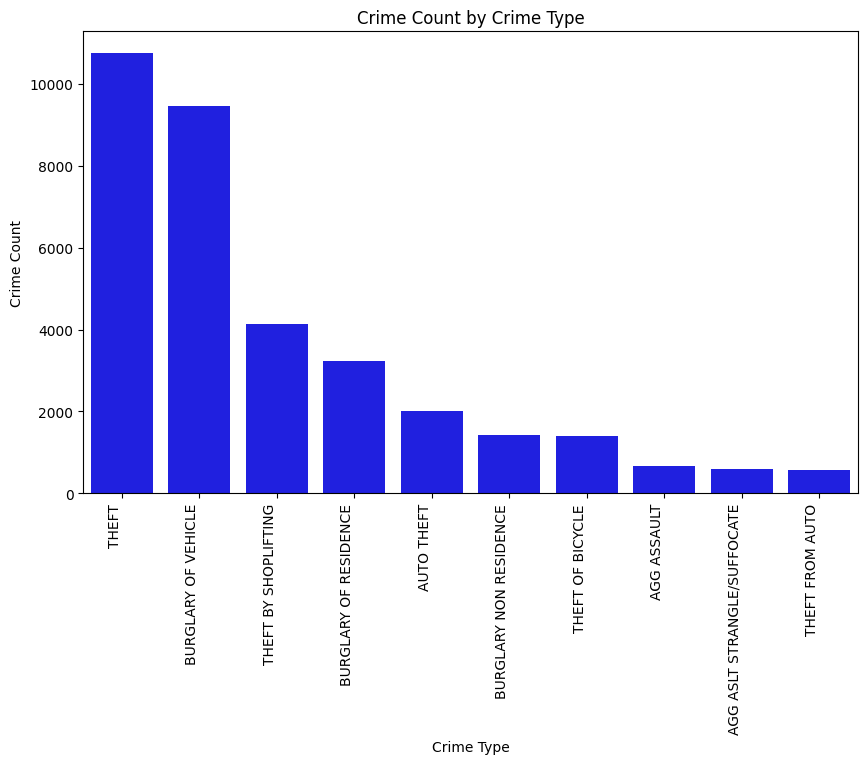

In [13]:
# create a bar plot of crime distribution by crime type
crime_distribution_by_type = crimeDf['Highest_Offense_Desc'].value_counts().head(10)

# Create a bar plot using seaborn with each district being a different color
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_distribution_by_type.index, y=crime_distribution_by_type.values, color='blue')
plt.title('Crime Count by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Crime Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Crimes by time of the year
I wonder if crimes are evenly spaced throughout the year?

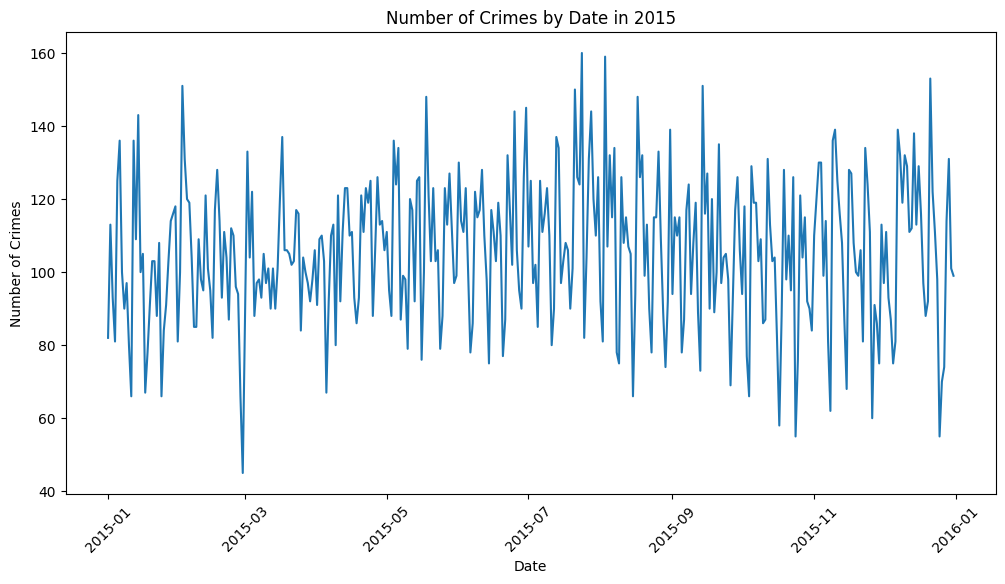

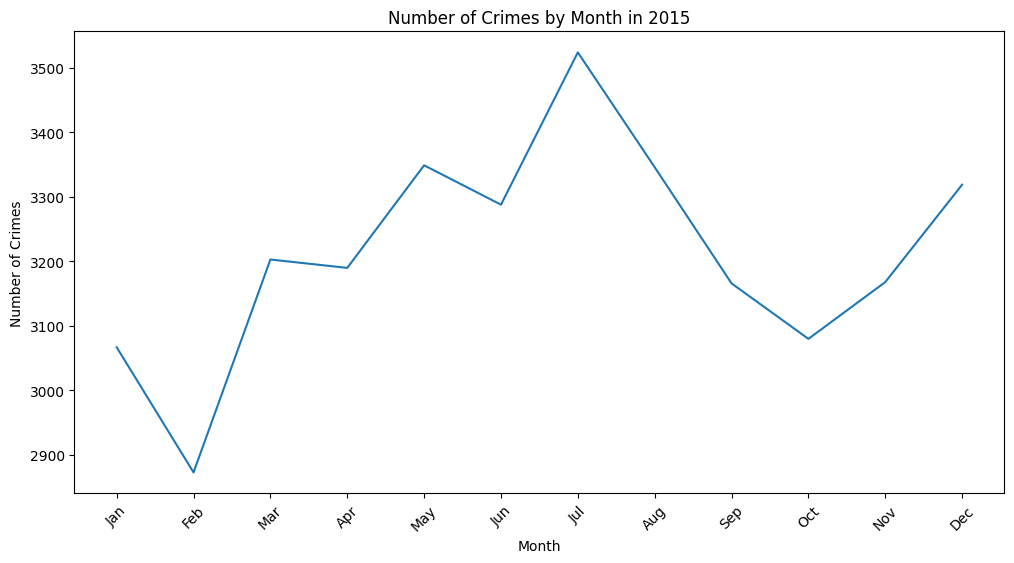

In [14]:
# Ensure 'Report_Date' is in datetime format
crimeDf['Report_Date'] = pd.to_datetime(crimeDf['Report_Date'], errors='coerce')

# Aggregate data to count crimes by date
daily_crime_counts = crimeDf.groupby('Report_Date').size().reset_index(name='Crime_Count')

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.lineplot(x='Report_Date', y='Crime_Count', data=daily_crime_counts)
plt.title('Number of Crimes by Date in 2015')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

# Group by month and count crimes
monthly_crime_counts = crimeDf.resample('M', on='Report_Date').size().reset_index(name='Crime_Count')

# Convert 'Report_Date' to month names for easy plotting
monthly_crime_counts['Month'] = monthly_crime_counts['Report_Date'].dt.strftime('%b')

# Ensure the data is sorted by date (if not already) to plot in chronological order
monthly_crime_counts.sort_values(by='Report_Date', inplace=True)

# Create the line plot using month names as the x-axis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Crime_Count', data=monthly_crime_counts)
plt.title('Number of Crimes by Month in 2015')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability
plt.show()


### Heatmap of crimes per day of the month
what might a heat map of this data look like?

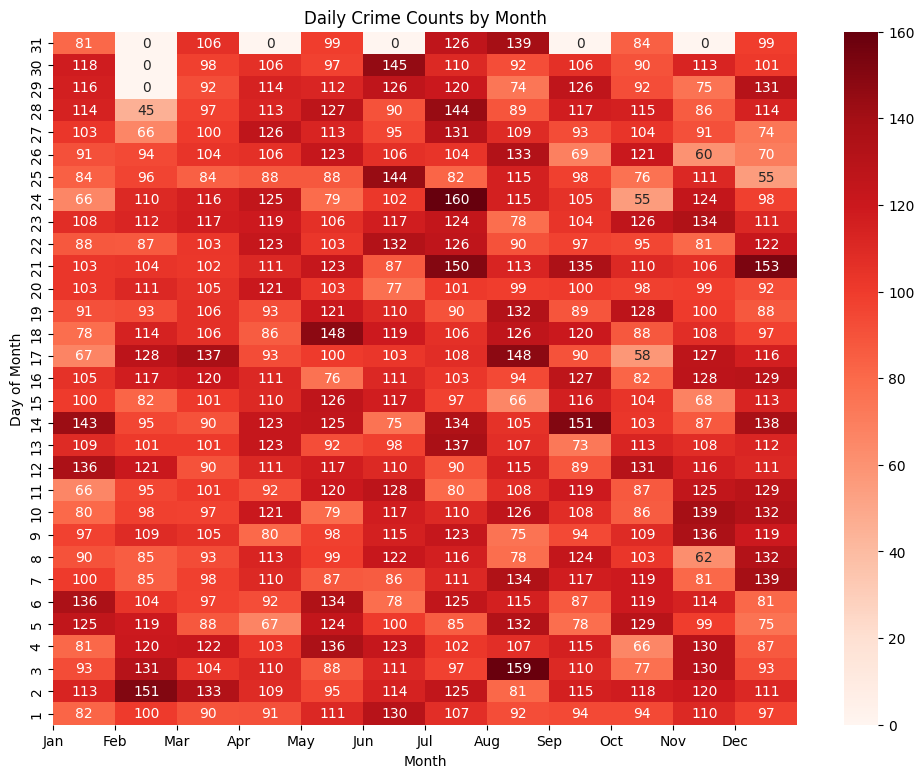

In [15]:
# Extract day and month from 'Report_Date'
crimeDf['Day'] = crimeDf['Report_Date'].dt.day
crimeDf['Month'] = crimeDf['Report_Date'].dt.month

# Create a pivot table
pivot_table_crimes = crimeDf.pivot_table(index='Day', columns='Month', values='Key', aggfunc='count', fill_value=0)

# Generate the heatmap
plt.figure(figsize=(12, 9))  # Adjust the size as needed
ax = sns.heatmap(pivot_table_crimes, cmap="Reds", annot=True, fmt="d")
plt.title('Daily Crime Counts by Month')
plt.xlabel('Month')
plt.ylabel('Day of Month')

# Invert the y-axis to have the day 1 at the bottom and 31 at the top
ax.invert_yaxis()

# Customize the x-axis with month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(len(pivot_table_crimes.columns)), labels=month_names)
plt.show()
